In [1]:
from flasher_lib import *

In [2]:
#definir variables
m=4
delta=np.pi/3.7
alpha=np.pi/2-np.pi/m
epsilon=np.pi/36
eta=(np.pi/m)-(epsilon/2)
i=6
j=m+1

In [3]:
def encontrar_indice(modulos, distancia_k):
    suma_modulos = 0
    for idx, modulo in enumerate(modulos):
        suma_modulos += modulo
        if distancia_k < suma_modulos:
            return idx
    return -1  # Si no encuentra un índice adecuado

In [4]:
def r_h_cte(i, m, delta, alpha, epsilon, altura):
    modulos = []  # Lista para guardar las distancias euclidianas de los puntos p a lo largo de i
    resultados = []  # Lista de tuplas para guardar los índices y remanentes encontrados

    # Calcular las distancias euclidianas entre los puntos p(i,0)
    for indice in range(1, i): #se elimina el primer modulo, ya que debe comenza desde p0 a p1
        distancia = e_distance(p(indice, 0, m, delta, alpha, epsilon), p(indice + 1, 0, m, delta, alpha, epsilon))
        modulos.append(distancia)
    distancia_k = dk(altura, epsilon, m)
    #print("distancia_k", distancia_k)

    puntos = np.floor(sum(modulos) / distancia_k)  # Calcular el número de puntos que se pueden recorrer
    #print("cantidad de puntos", puntos)
    for i in range(int(puntos)):
        indice = encontrar_indice(modulos, distancia_k*(i+1))
        if indice == -1:
            break
        remanente = distancia_k*(i+1) - sum(modulos[:indice])
        resultados.append((indice, remanente))  
        # print("indice", indice)      
        # print("remanente", remanente)
        # print("distancia k", distancia_k*(i+1))

    return resultados

In [5]:
puntos_p=[]
for k in range(8):
    x,y=p(k,0,m, delta, alpha, epsilon)
    print(x,y)

1 0
1.1270178197468792 1.9919004352588767
1.0716592199373032 4.3386076538143925
0.7298186811911402 7.409722420975152
-0.12596066349772572 11.672592448540488
-1.9081841560728872 17.747106159907204
-5.3191310268078515 26.47261753549143
-11.519263053391999 38.98937631973318


In [6]:
indices_y_distancias=r_h_cte(8, m, delta, alpha, epsilon, 7)
print(indices_y_distancias)

[(3, 0.587729913137153), (4, 4.630258446005268), (5, 5.6348339145995965), (6, 2.0397163057702627), (6, 12.41280858976426)]


In [7]:
def u_normalizado(theta):
    # Asegúrate de que esta función calcule correctamente el vector unitario
    dx = np.cos(theta)
    dy = np.sin(theta)
    return np.array([dx, dy]) / np.linalg.norm([dx, dy])


In [8]:
def nuevo_r(i, m, delta, alpha, epsilon, altura):
    # Obtener los índices y remanentes relativos para los puntos r(i,0,0)
    resultados = r_h_cte(i, m, delta, alpha, epsilon, altura)

    # Inicializar lista para almacenar los puntos r(i,0,0)
    puntos_r = []

    # Calcular cada r(i,0,0)
    for idx, remanente in resultados:
        p_start = p(idx, 0, m, delta, alpha, epsilon)
        print("punto de inicio", p_start)

        # Dirección unitaria usando theta
        direccion = u_normalizado(theta(idx, 0, delta, alpha, epsilon, m))
        print("direccion", direccion)

        # Vector desplazamiento desde p(idx,0) en dirección de p(idx+1,0)
        desplazamiento = remanente * direccion
        print("remanente"   , remanente)
        nuevo_punto_r = p_start + desplazamiento
        print("nuevo punto r", nuevo_punto_r)
        puntos_r.append(nuevo_punto_r)
    
    return puntos_r


In [9]:
coordenadas_r=nuevo_r(8, m, delta, alpha, epsilon, 7)
print(coordenadas_r)

punto de inicio [0.72981868 7.40972242]
direccion [-0.19682494  0.98043865]
remanente 0.587729913137153
nuevo punto r [0.61413878 7.98595554]
punto de inicio [-0.12596066 11.67259245]
direccion [-0.28152682  0.95955336]
remanente 4.630258446005268
nuevo punto r [-1.42950261 16.11557249]
punto de inicio [-1.90818416 17.74710616]
direccion [-0.36408611  0.93136529]
remanente 5.6348339145995965
nuevo punto r [-3.95974893 22.99519488]
punto de inicio [-5.31913103 26.47261754]
direccion [-0.44387449  0.89608897]
remanente 2.0397163057702627
nuevo punto r [-6.22450906 28.30038481]
punto de inicio [-5.31913103 26.47261754]
direccion [-0.44387449  0.89608897]
remanente 12.41280858976426
nuevo punto r [-10.8288601   37.59559837]
[array([0.61413878, 7.98595554]), array([-1.42950261, 16.11557249]), array([-3.95974893, 22.99519488]), array([-6.22450906, 28.30038481]), array([-10.8288601 ,  37.59559837])]


punto de inicio [0.72981868 7.40972242]
direccion [-0.19682494  0.98043865]
remanente 0.587729913137153
nuevo punto r [0.61413878 7.98595554]
punto de inicio [-0.12596066 11.67259245]
direccion [-0.28152682  0.95955336]
remanente 4.630258446005268
nuevo punto r [-1.42950261 16.11557249]
punto de inicio [-1.90818416 17.74710616]
direccion [-0.36408611  0.93136529]
remanente 5.6348339145995965
nuevo punto r [-3.95974893 22.99519488]
punto de inicio [-5.31913103 26.47261754]
direccion [-0.44387449  0.89608897]
remanente 2.0397163057702627
nuevo punto r [-6.22450906 28.30038481]
punto de inicio [-5.31913103 26.47261754]
direccion [-0.44387449  0.89608897]
remanente 12.41280858976426
nuevo punto r [-10.8288601   37.59559837]


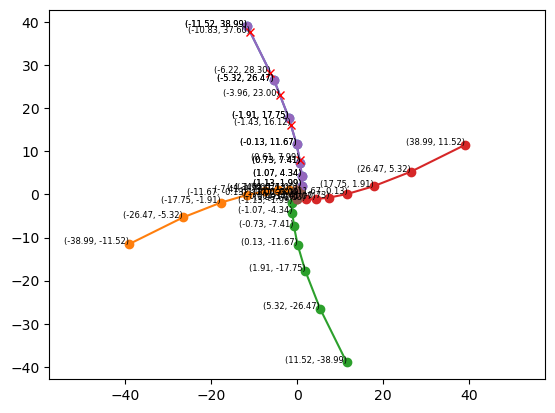

In [10]:
import matplotlib.pyplot as plt
i_values = range(8)
j_values = range(m+1)
h=7
# Inicializar matrices para almacenar coordenadas
x_values_p = np.zeros((len(i_values), len(j_values)))
y_values_p = np.zeros((len(i_values), len(j_values)))

# Rellenar matrices con los puntos generados por pij
for i in i_values:
    for j in j_values:
        x_values_p[i, j] = p(i, j, m, delta, alpha, epsilon)[0]
        y_values_p[i, j] = p(i, j, m, delta, alpha, epsilon)[1]
        #plt.text(x_values_p[i, j], y_values_p[i, j], f'p({i},{j})', fontsize=6, ha='right')
        plt.text(x_values_p[i, j], y_values_p[i, j], f'({x_values_p[i, j]:.2f}, {y_values_p[i, j]:.2f})', fontsize=6, ha='right')
# Graficar y conectar los puntos por j
for j in j_values:
    plt.plot(x_values_p[:, j], y_values_p[:, j], 'o-', label=f'j={j}')

#graficar los puntos con i=0
plt.plot(x_values_p[0, :], y_values_p[0, :], 'o-', label='i=0')

puntos_r = nuevo_r(8, m, delta, alpha, epsilon, h) 
for punto in puntos_r:
    plt.plot(punto[0], punto[1], 'rx')  # Marcar los puntos r(i,0,0) en rojo con una 'x'
    plt.text(punto[0], punto[1], f'({punto[0]:.2f}, {punto[1]:.2f})', fontsize=6, ha='right')

plt.axis('equal')
# plt.ylim(0,40)
# plt.xlim(-20, 20)
plt.show()


In [11]:
p1 = np.array([-10.8288601,   37.59559837])
p2 = np.array([-11.52, 38.99])

distancia_1 = e_distance(p1, p2)
print(distancia_1)

1.5562873343694212


In [12]:
modulos_r = []  # Lista para guardar los módulos de los puntos r_nuevos

for punto in range(len(puntos_r)-1):
    modulo = e_distance(puntos_r[punto], puntos_r[punto+1])
    modulos_r.append(modulo)

print(modulos_r)

[8.382549842901373, 7.3301671638088015, 5.768377473245067, 10.373092283993998]


In [13]:
print(theta(3, 0, delta, alpha, epsilon, m))

1.768914782426685
